       temperatura_media  precipitazioni  umidita  velocita_vento
count            1000.00         1000.00  1000.00         1000.00
mean               12.61           10.16    60.44           47.61
std                13.29            5.85    17.25           28.40
min                -9.98            0.00    30.10            0.01
25%                 1.60            5.16    46.46           22.84
50%                12.10           10.27    59.89           46.66
75%                24.23           15.39    75.49           71.86
max                34.99           19.97    90.00           99.57
La deviazione standard della temperatura è:  13.278679413748137
La temperatura media è :  12.61135233844755
La deviazione standard dell'umidità è:  17.239264726476666
L'umidità media è:  60.440852821466784
La deviazione standard delle precipitazioni è: :  5.84599482939954
Le precipitazioni medie sono:  10.156890783992786
La deviazione standard della velocità del vento è:  28.384167008353234
La velocità 

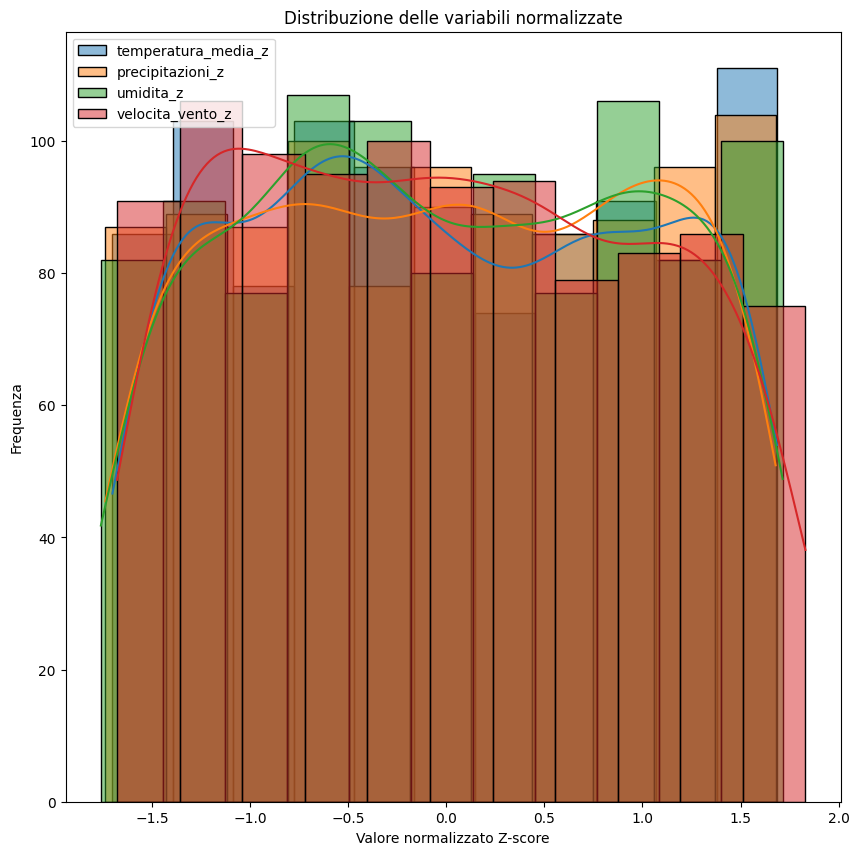

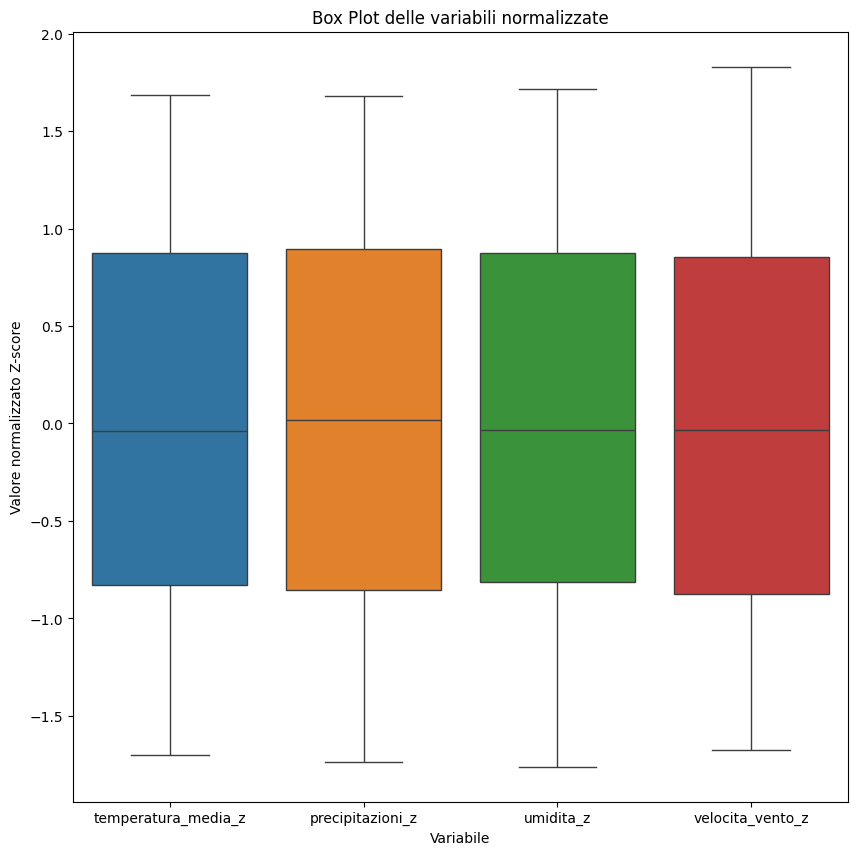

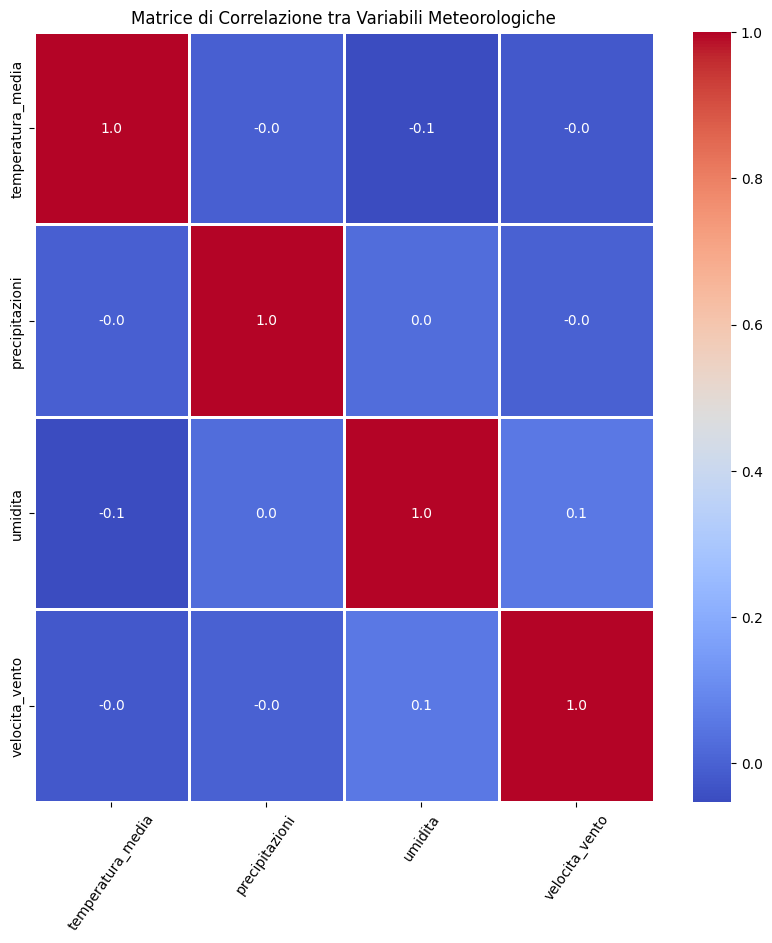

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

file_dir = "./dataset_climatico.csv"

table = pd.read_csv(file_dir)
dati_puliti = table.dropna().drop_duplicates()
print(dati_puliti.describe().round(2))

#print(dati_puliti.tail(10)) #da riga 990 alla 999 

#temperatura_media_per_stazione = dati_puliti.groupby('stazione_meteorologica')['temperatura_media'].mean()
# temperatura media dei primi 3 valori: temperatura_3 = dati_puliti['temperatura_media'].head(3).mean()

#dati_puliti['zscore'] = (dati_puliti['temperatura_media'] - dati_puliti['temperatura_media'].mean()) / dati_puliti['temperatura_media'].std(ddof=0)


deviazione_std_temperatura_media = np.std(dati_puliti["temperatura_media"])
print("La deviazione standard della temperatura è: ", deviazione_std_temperatura_media)
media_temperatura = np.mean(dati_puliti["temperatura_media"])
print("La temperatura media è : ", media_temperatura)
deviazione_std_umidita = np.std(dati_puliti["umidita"])
print("La deviazione standard dell'umidità è: ", deviazione_std_umidita)
media_umidita = np.mean(dati_puliti["umidita"])
print("L'umidità media è: ", media_umidita)
deviazione_std_precipitazioni = np.std(dati_puliti["precipitazioni"])
print("La deviazione standard delle precipitazioni è: : ", deviazione_std_precipitazioni)
media_precipitazioni = np.mean(dati_puliti["precipitazioni"])
print("Le precipitazioni medie sono: ", media_precipitazioni)
deviazione_std_velocita_vento = np.std(dati_puliti["velocita_vento"])
print("La deviazione standard della velocità del vento è: ", deviazione_std_velocita_vento)
media_velocita_vento = np.mean(dati_puliti["velocita_vento"])
print("La velocità media del vento è: ", media_velocita_vento)


#Z - Score
dati_puliti['temperatura_media_z'] = stats.zscore(dati_puliti['temperatura_media'])
dati_puliti['precipitazioni_z'] = stats.zscore(dati_puliti['precipitazioni'])
dati_puliti['umidita_z'] = stats.zscore(dati_puliti['umidita'])
dati_puliti['velocita_vento_z'] = stats.zscore(dati_puliti['velocita_vento'])
print(dati_puliti[['temperatura_media_z', 'precipitazioni_z', 'umidita_z', 'velocita_vento_z']])
statistiche = dati_puliti[['temperatura_media_z', 'precipitazioni_z', 'umidita_z', 'velocita_vento_z']].describe()
print(statistiche)

plt.figure(figsize = (10,10))
for col in statistiche.columns:
    sns.histplot(dati_puliti[col], kde=True, label=col)

plt.xlabel('Valore normalizzato Z-score')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle variabili normalizzate')
plt.legend(loc ='best')
plt.savefig('Distribuzioni Variabili Normalizzate.png')
plt.show()

plt.figure(figsize = (10,10))
sns.boxplot(data = dati_puliti[['temperatura_media_z', 'precipitazioni_z', 'umidita_z', 'velocita_vento_z']])
plt.xlabel('Variabile')
plt.ylabel('Valore normalizzato Z-score')
plt.title('Box Plot delle variabili normalizzate')
plt.savefig('Box Plot delle variabili normalizzate.png')
plt.show()


plt.figure(figsize = (10,10))
colonne_numeriche = dati_puliti.select_dtypes(include='number').columns[0:4]
corr_matrix = dati_puliti[colonne_numeriche].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.8)
plt.title('Matrice di Correlazione tra Variabili Meteorologiche')
plt.xticks(rotation = 55) 
plt.savefig('Correlazioni variabili meteorologiceh.png')
plt.show()
